# New Task: Use NLP to analyze 'motive' and find correlates to target type and attack type.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
filepath1 = r'C:/Users/casti/OneDrive/Documents/A Springboard/Capstone 2 - Global Terrorism/data/interim/gtdus_clean.csv'
df = pd.read_csv(filepath1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3147 entries, 0 to 3146
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   eventid           3147 non-null   int64  
 1   date              3147 non-null   object 
 2   extended          3147 non-null   int64  
 3   provstate         3147 non-null   object 
 4   city              3147 non-null   object 
 5   latitude          3147 non-null   float64
 6   longitude         3147 non-null   float64
 7   specificity       3147 non-null   float64
 8   vicinity          3147 non-null   int64  
 9   summary           2098 non-null   object 
 10  crit1             3147 non-null   int64  
 11  crit2             3147 non-null   int64  
 12  crit3             3147 non-null   int64  
 13  success           3147 non-null   int64  
 14  suicide           3147 non-null   int64  
 15  attacktype1_txt   3147 non-null   object 
 16  targtype1_txt     3147 non-null   object 


In [118]:
df.summary.value_counts()

summary
05/04/2002: Between the dates of May 3-7, 2002, eighteen pipe bombs were found in rural mailboxes in five Midwestern states in the U.S.A., collectively causing seven injuries and leading to widespread panic in the region. Most of the explosives came with typewritten notes that bemoaned the power of the government and threatened more attacks. In the incidents that occurred on May 4-5, 2002, seven bombs were found in mailboxes in the southern and central counties of Nebraska. None of these bombs detonated and no injuries were suffered. On May 7, 2002, the FBI and Nevada state authorities arrested Luke Helder, a 21-year-old college student, who confessed to being responsible for all of the bombs.                                                                                                                                                                                          6
05/03/2002: Between the dates of May 3-7, 2002 eighteen pipe bombs were found in rural mailboxes in fi

In [100]:
df.provstate.unique()

array(['Illinois', 'Wisconsin', 'Colorado', 'Puerto Rico', 'New York',
       'Washington', 'New Jersey', 'Nebraska', 'Mississippi', 'Ohio',
       'Florida', 'Oregon', 'Massachusetts', 'California', 'Louisiana',
       'Arizona', 'Michigan', 'New Mexico', 'Maryland',
       'District of Columbia', 'Georgia', 'Texas', 'Kansas',
       'Pennsylvania', 'Minnesota', 'Connecticut', 'Iowa', 'Missouri',
       'Indiana', 'North Carolina', 'Oklahoma', 'Idaho', 'Utah', 'Hawaii',
       'Nevada', 'Virginia', 'South Dakota', 'Alabama', 'Maine',
       'Kentucky', 'Vermont', 'Tennessee', 'Arkansas', 'Delaware',
       'Montana', 'North Dakota', 'New Hampshire', 'South Carolina',
       'Wyoming', 'Rhode Island', 'West Virginia', 'U.S. Virgin Islands'],
      dtype=object)

In [101]:
df = df.loc[(df.provstate != 'U.S. Virgin Islands') & (df.provstate != 'Puerto Rico'), :]

In [119]:
dfm = df[['eventid','attacktype1_txt','targtype1_txt','motive','summary']]

In [125]:
dfm = dfm.dropna()

In [104]:
dfm.motive.value_counts()

motive
To kill police                                                                                                                                                                                                                                                                                                                                                                                                                                                             24
While most law enforcement personnel involved in solving the Zebra murders agree that the killers were motivated by the goal of starting a race war, certain sources allege that the impetus for these attacks was based upon revenge for the illegitimate killing of black people as well as upon the desire of personal promotion within both the ranks of the "Death Angels" (as indicated by the prosecution's main witness, Anthony Harris) and the eyes of Allah.    20
The attacks were meant to bring attention to the perpetrator's antigo

In [126]:
dfm = dfm.loc[(df['motive'] != 'Unspecified') & (df['motive'] != 'Unknown') & (df['motive'] != 'The specific motive for the attack is unknown.'),:]

In [106]:
df.motive.value_counts()

motive
To kill police                                                                                                                                                                                                                                                                                                                                                                                                                                                             24
While most law enforcement personnel involved in solving the Zebra murders agree that the killers were motivated by the goal of starting a race war, certain sources allege that the impetus for these attacks was based upon revenge for the illegitimate killing of black people as well as upon the desire of personal promotion within both the ranks of the "Death Angels" (as indicated by the prosecution's main witness, Anthony Harris) and the eyes of Allah.    20
The attacks were meant to bring attention to the perpetrator's antigo

In [127]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1421 entries, 0 to 3146
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   eventid          1421 non-null   int64 
 1   attacktype1_txt  1421 non-null   object
 2   targtype1_txt    1421 non-null   object
 3   motive           1421 non-null   object
 4   summary          1421 non-null   object
dtypes: int64(1), object(4)
memory usage: 66.6+ KB


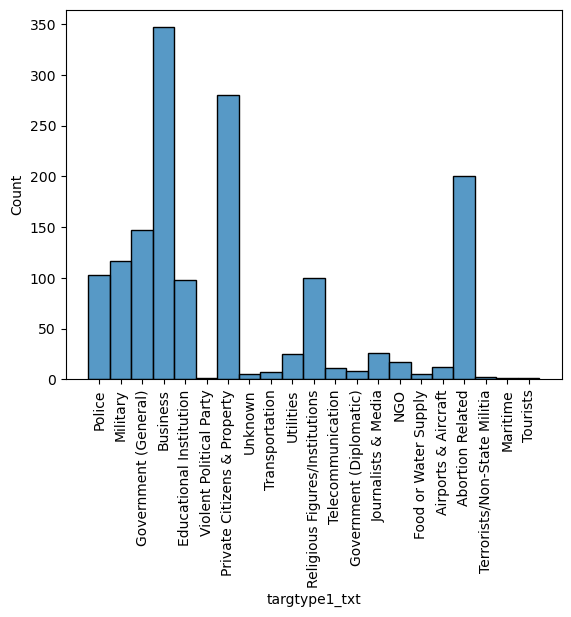

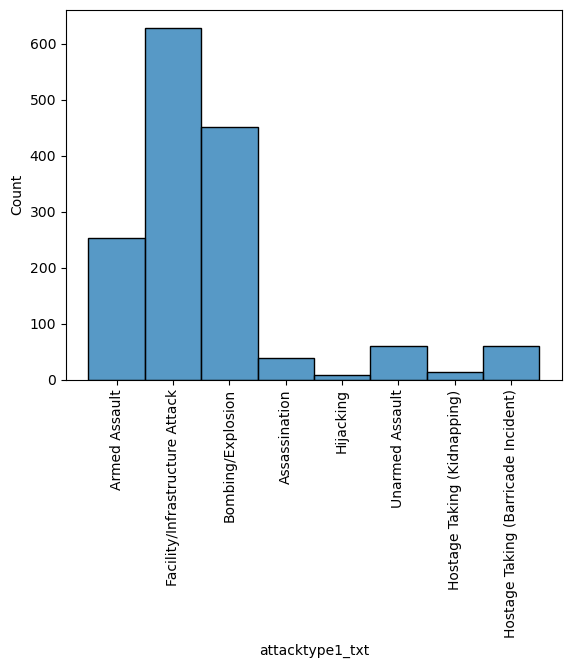

In [54]:
cols = ['targtype1_txt','attacktype1_txt']
for feat in cols:
    sns.histplot(dfm[feat])
    plt.xticks(rotation=90)
    plt.show();

In [79]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from scipy.stats import pointbiserialr
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\casti\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\casti\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [128]:
dfm['tokenized_text'] = dfm['motive'].apply(word_tokenize)

In [129]:
stop_words = set(stopwords.words('english'))
dfm['filtered_text'] = dfm['tokenized_text'].apply(lambda x: [word for word in x if word.lower() not in stop_words])

In [110]:
dfm.head()

eventid                 attacktype1_txt            targtype1_txt  \
0  197001010002                   Armed Assault                   Police   
2  197001020003  Facility/Infrastructure Attack                 Military   
3  197001030001  Facility/Infrastructure Attack     Government (General)   
5  197001060001  Facility/Infrastructure Attack                 Military   
8  197001120001               Bombing/Explosion  Educational Institution   

                                              motive  \
0     To protest the Cairo Illinois Police Deparment   
2        To protest the War in Vietnam and the draft   
3        To protest the War in Vietnam and the draft   
5                  Protest the draft and Vietnam War   
8  Suspected motives were to protest the Vietnam ...   

                                      tokenized_text  \
0  [To, protest, the, Cairo, Illinois, Police, De...   
2  [To, protest, the, War, in, Vietnam, and, the,...   
3  [To, protest, the, War, in, Vietnam, and, the,...   
5           [Protest, the, draft, and, Vietnam, War]   
8  [Suspected, motives, were, to, protest, the, V...   

                                       filtered_text  
0      [protest, Cairo, Illinois, Police, Deparment]  
2                     [protest, War, Vietnam, draft]  
3                     [protest, War, Vietnam, draft]  
5                     [Protest, draft, Vietnam, War]  
8  [Suspected, motives, protest, Vietnam, War, an...

In [111]:
tfidf_vectorizer = TfidfVectorizer()
text_vectorized = tfidf_vectorizer.fit_transform(dfm['filtered_text'].apply(lambda x: ' '.join(x)))

In [112]:
label_encoder = LabelEncoder()
dfm['targ_enc'] = label_encoder.fit_transform(dfm['targtype1_txt'])
dfm['att_enc'] = label_encoder.fit_transform(dfm['attacktype1_txt'])

In [113]:
dfm.head()

eventid                 attacktype1_txt            targtype1_txt  \
0  197001010002                   Armed Assault                   Police   
2  197001020003  Facility/Infrastructure Attack                 Military   
3  197001030001  Facility/Infrastructure Attack     Government (General)   
5  197001060001  Facility/Infrastructure Attack                 Military   
8  197001120001               Bombing/Explosion  Educational Institution   

                                              motive  \
0     To protest the Cairo Illinois Police Deparment   
2        To protest the War in Vietnam and the draft   
3        To protest the War in Vietnam and the draft   
5                  Protest the draft and Vietnam War   
8  Suspected motives were to protest the Vietnam ...   

                                      tokenized_text  \
0  [To, protest, the, Cairo, Illinois, Police, De...   
2  [To, protest, the, War, in, Vietnam, and, the,...   
3  [To, protest, the, War, in, Vietnam, and, the,...   
5           [Protest, the, draft, and, Vietnam, War]   
8  [Suspected, motives, were, to, protest, the, V...   

                                       filtered_text  targ_enc  att_enc  
0      [protest, Cairo, Illinois, Police, Deparment]        11        0  
2                     [protest, War, Vietnam, draft]         9        3  
3                     [protest, War, Vietnam, draft]         6        3  
5                     [Protest, draft, Vietnam, War]         9        3  
8  [Suspected, motives, protest, Vietnam, War, an...         3        2

In [114]:
combined_features = pd.concat([dfm[['targ_enc', 'att_enc']], pd.DataFrame(text_vectorized.toarray(), columns=tfidf_vectorizer.get_feature_names_out())], axis=1)

In [115]:
combined_features

targ_enc  att_enc  000   10  100   11  11th  150  1619   17  ...  \
0         11.0      0.0  0.0  0.0  0.0  0.0   0.0  0.0   0.0  0.0  ...   
2          9.0      3.0  0.0  0.0  0.0  0.0   0.0  0.0   0.0  0.0  ...   
3          6.0      3.0  0.0  0.0  0.0  0.0   0.0  0.0   0.0  0.0  ...   
5          9.0      3.0  0.0  0.0  0.0  0.0   0.0  0.0   0.0  0.0  ...   
8          3.0      2.0  0.0  0.0  0.0  0.0   0.0  0.0   0.0  0.0  ...   
...        ...      ...  ...  ...  ...  ...   ...  ...   ...  ...  ...   
1420       NaN      NaN  0.0  0.0  0.0  0.0   0.0  0.0   0.0  0.0  ...   
1421       NaN      NaN  0.0  0.0  0.0  0.0   0.0  0.0   0.0  0.0  ...   
1422       NaN      NaN  0.0  0.0  0.0  0.0   0.0  0.0   0.0  0.0  ...   
1423       NaN      NaN  0.0  0.0  0.0  0.0   0.0  0.0   0.0  0.0  ...   
1424       NaN      NaN  0.0  0.0  0.0  0.0   0.0  0.0   0.0  0.0  ...   

      yugoslavia  zaremski  zealand  zebra  zeldin  zero  zhang  zionist  \
0            0.0       0.0      0.0    0.0     0.0   0.0    0.0      0.0   
2            0.0       0.0      0.0    0.0     0.0   0.0    0.0      0.0   
3            0.0       0.0      0.0    0.0     0.0   0.0    0.0      0.0   
5            0.0       0.0      0.0    0.0     0.0   0.0    0.0      0.0   
8            0.0       0.0      0.0    0.0     0.0   0.0    0.0      0.0   
...          ...       ...      ...    ...     ...   ...    ...      ...   
1420         0.0       0.0      0.0    0.0     0.0   0.0    0.0      0.0   
1421         0.0       0.0      0.0    0.0     0.0   0.0    0.0      0.0   
1422         0.0       0.0      0.0    0.0     0.0   0.0    0.0      0.0   
1423         0.0       0.0      0.0    0.0     0.0   0.0    0.0      0.0   
1424         0.0       0.0      0.0    0.0     0.0   0.0    0.0      0.0   

      zionists  zuniga  
0          0.0     0.0  
2          0.0     0.0  
3          0.0     0.0  
5          0.0     0.0  
8          0.0     0.0  
...        ...     ...  
1420       0.0     0.0  
1421       0.0     0.0  
1422       0.0     0.0  
1423       0.0     0.0  
1424       0.0     0.0  

[2370 rows x 3353 columns]

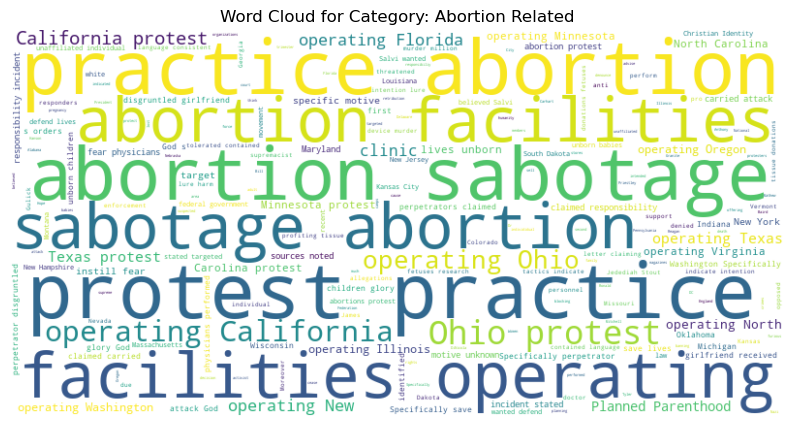

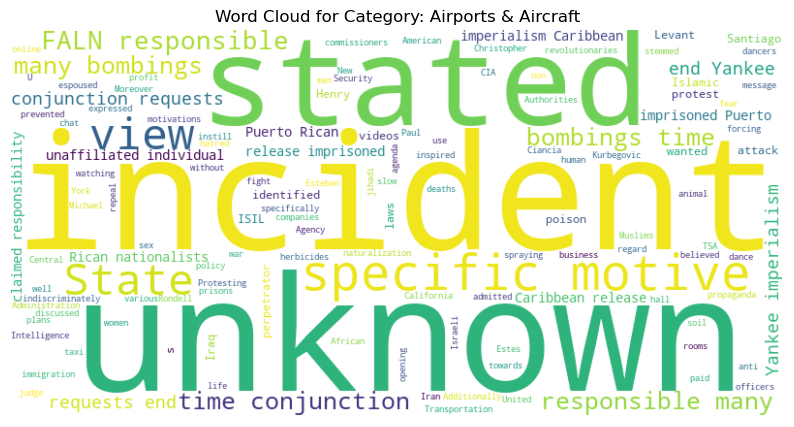

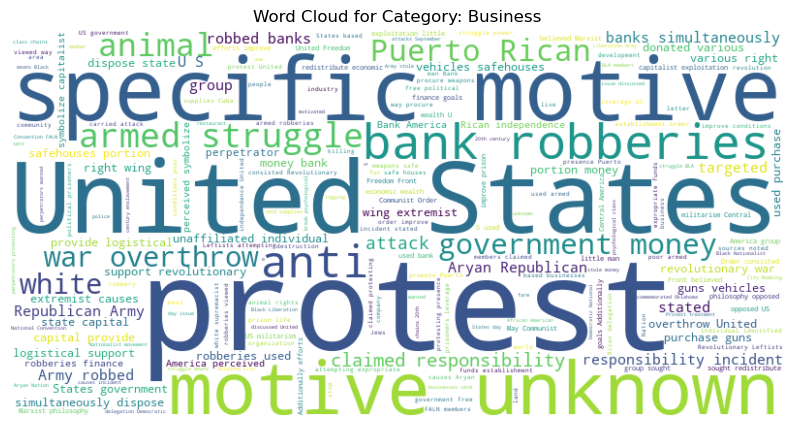

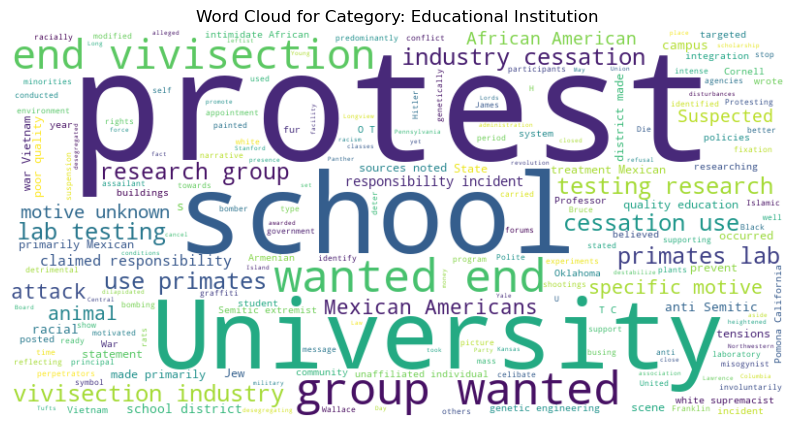

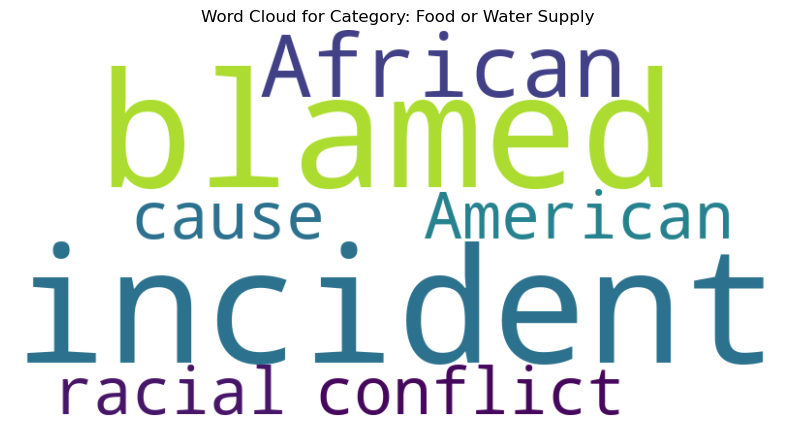

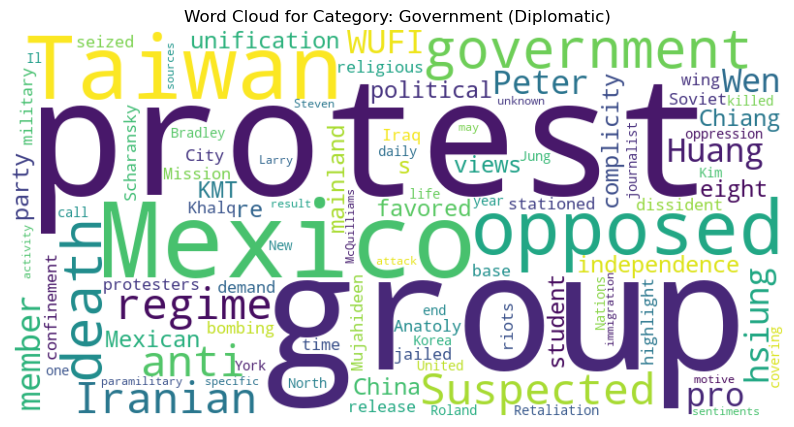

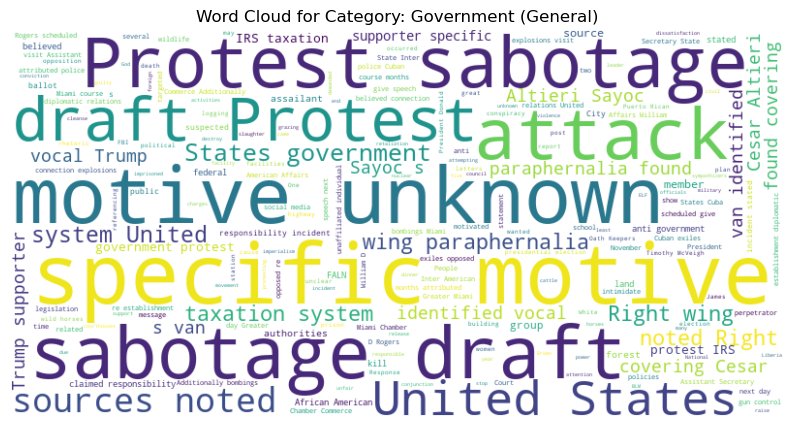

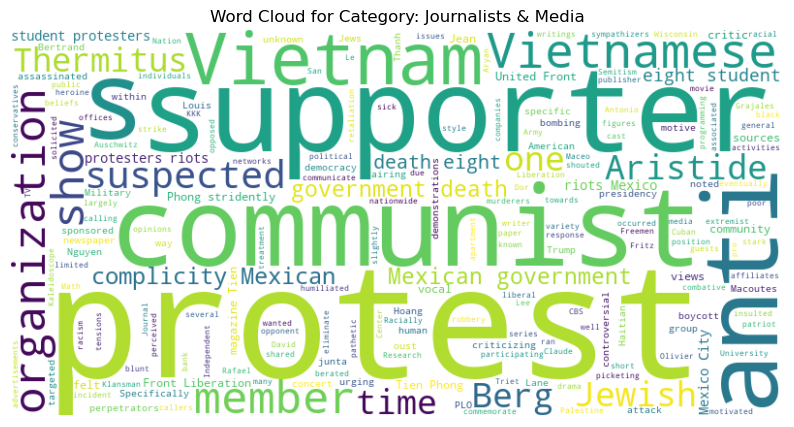

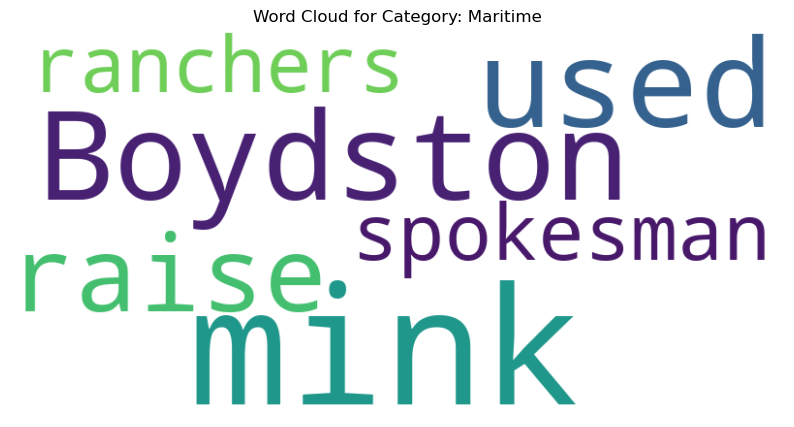

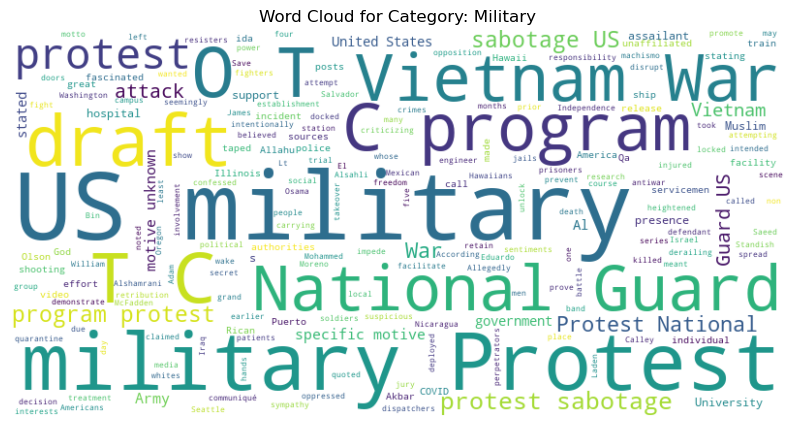

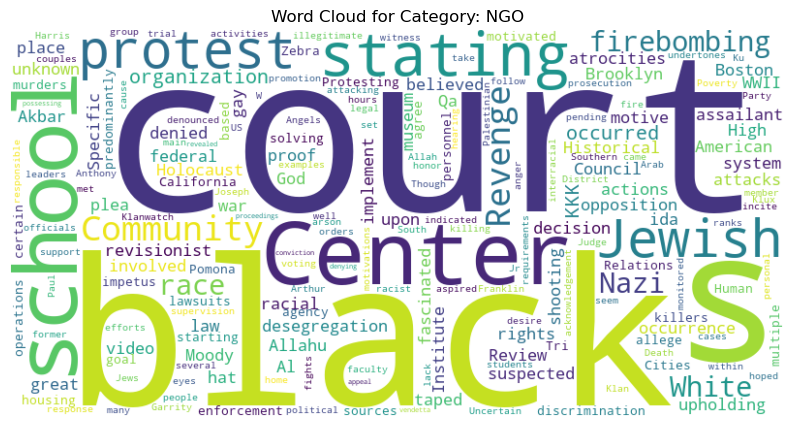

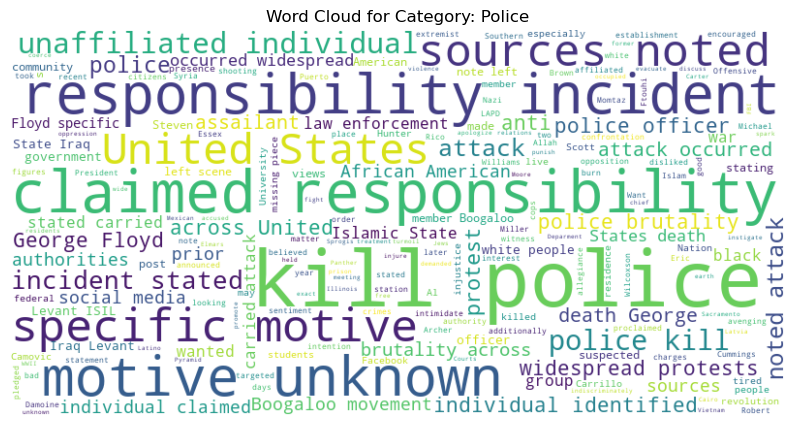

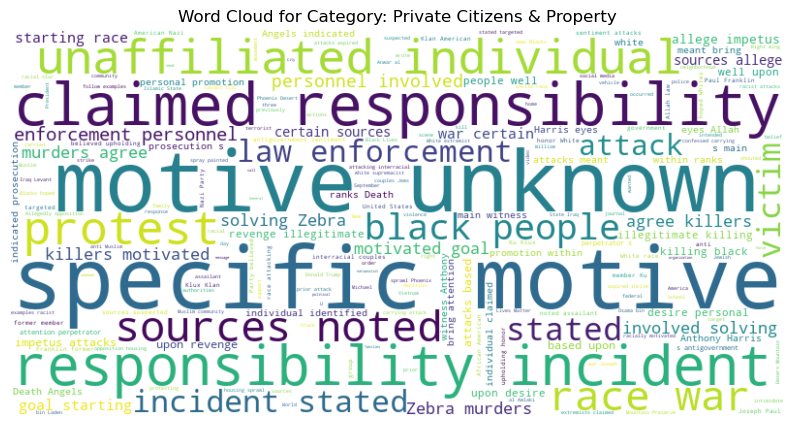

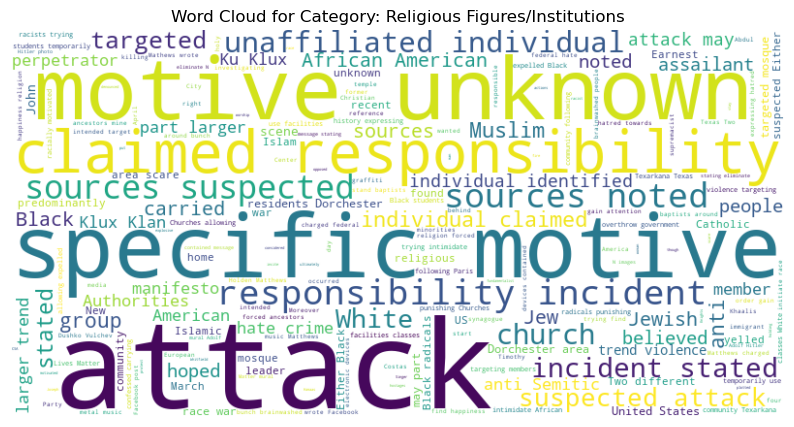

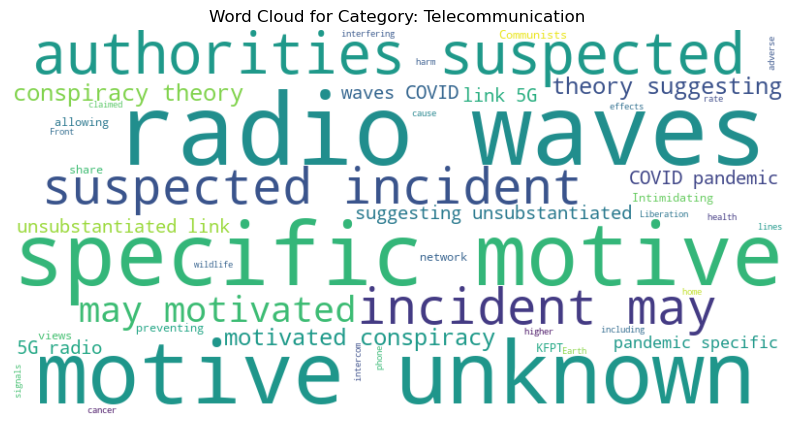

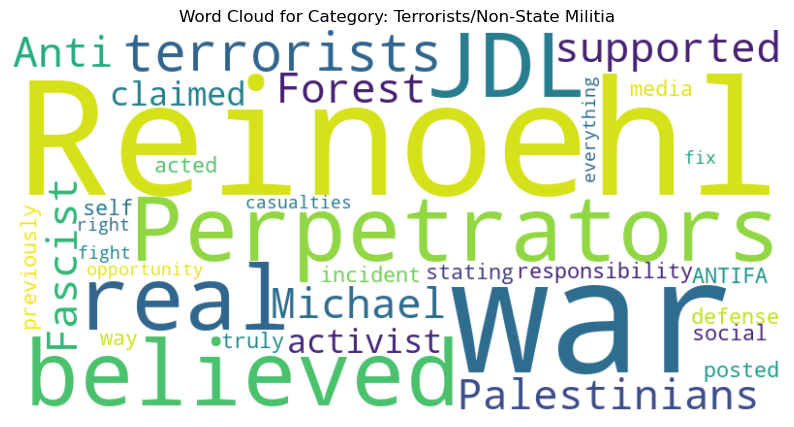

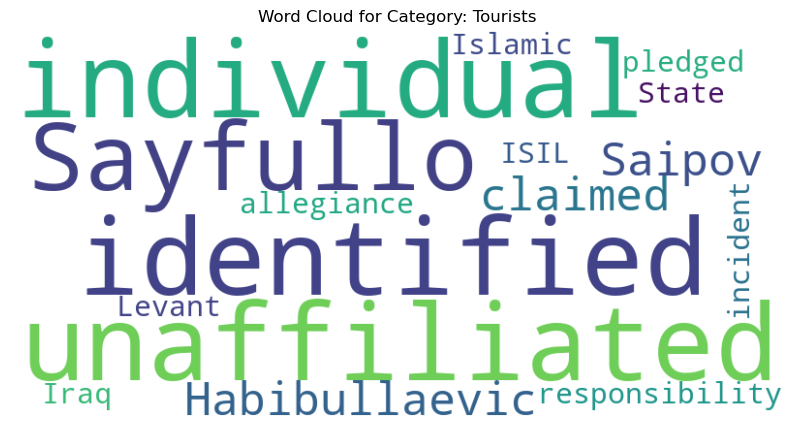

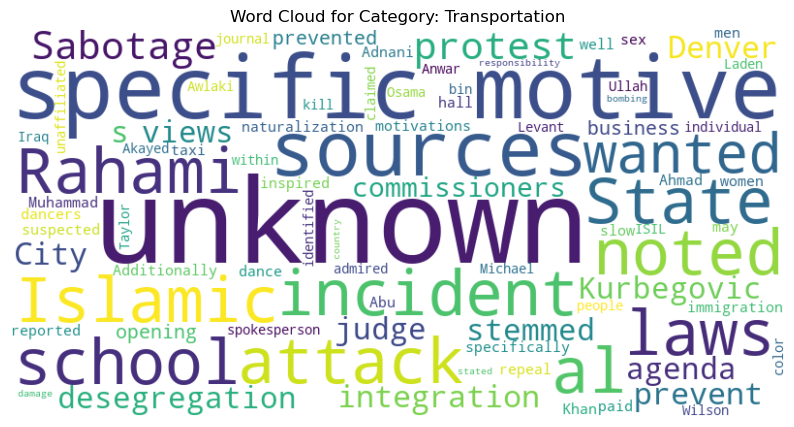

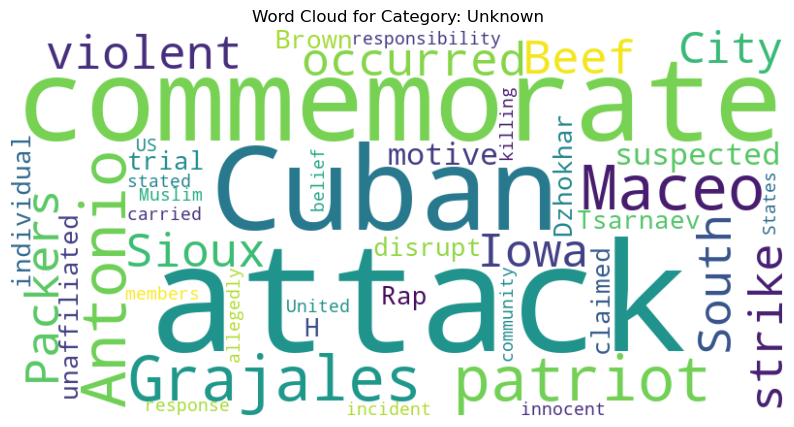

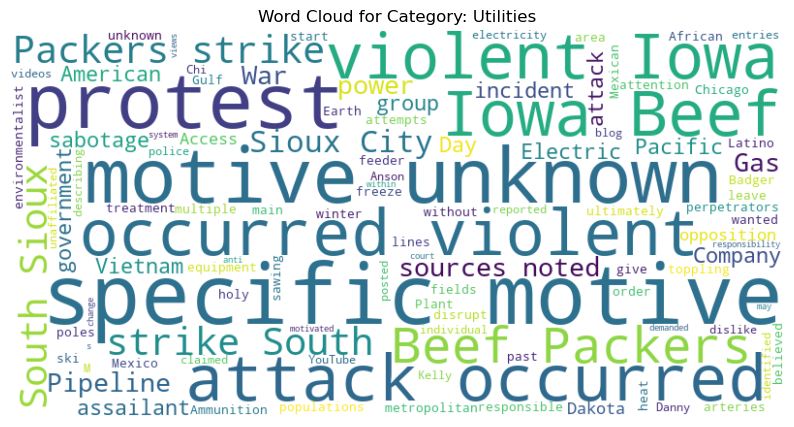

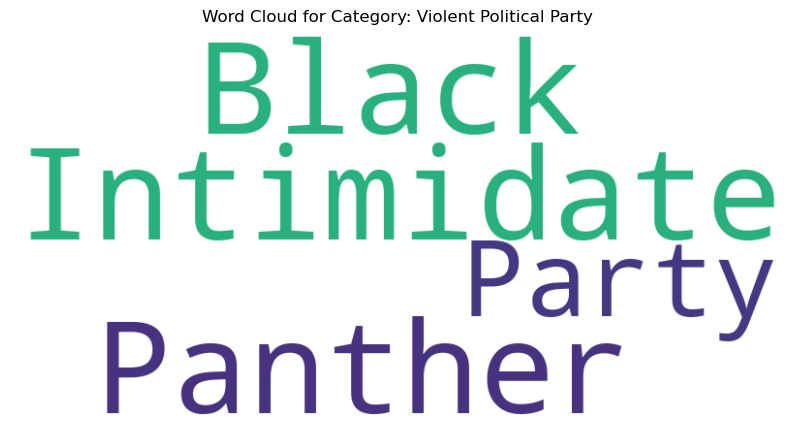

In [116]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

grouped_data = df.groupby('targtype1_txt')['motive'].apply(lambda x: ' '.join(x))

def tokenize_without_stopwords(text):
    tokens = word_tokenize(text)
    return [word for word in tokens if word.lower() not in stop_words]
    
for category, text in grouped_data.items():
    # Tokenize text and remove stopwords
    tokens = tokenize_without_stopwords(text)
    
    # Create word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(tokens))
    
    # Display word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Category: {category}')
    plt.axis('off')
    plt.show()

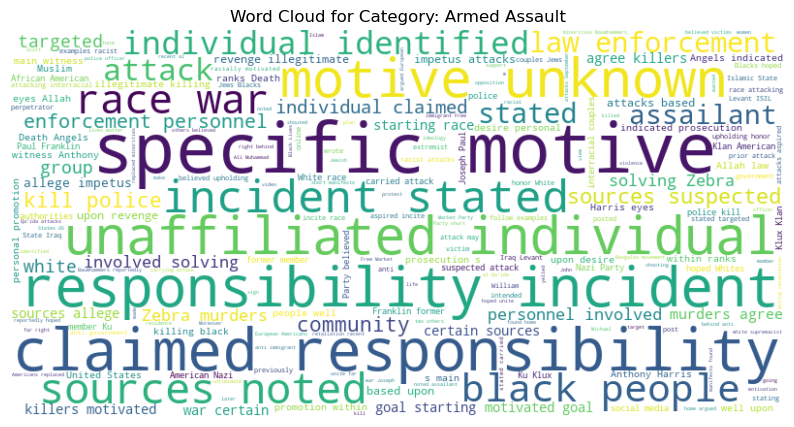

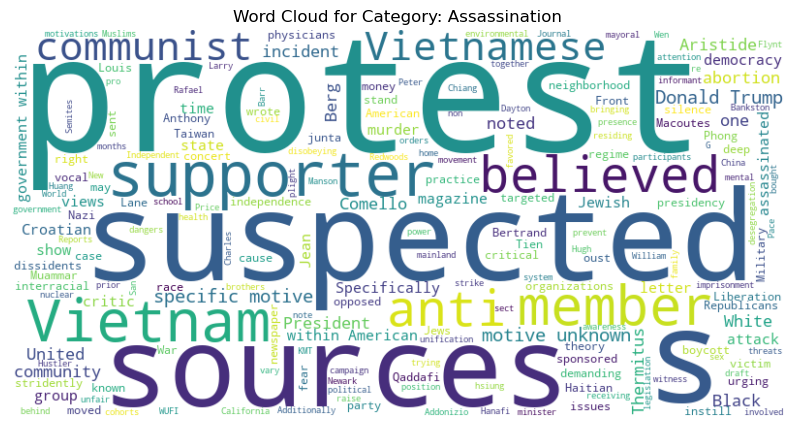

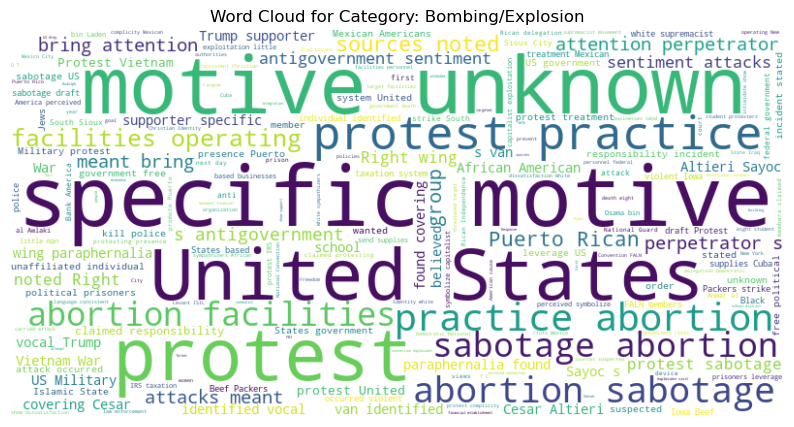

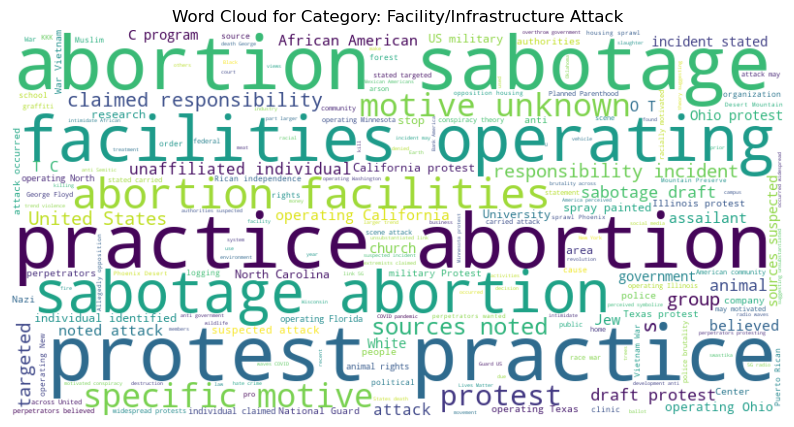

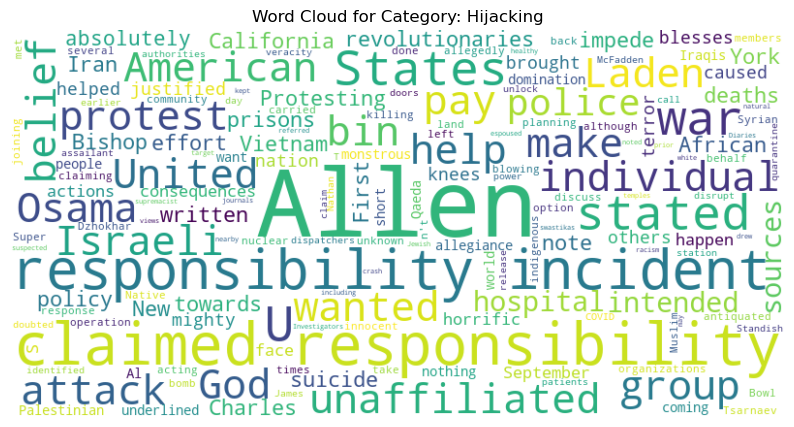

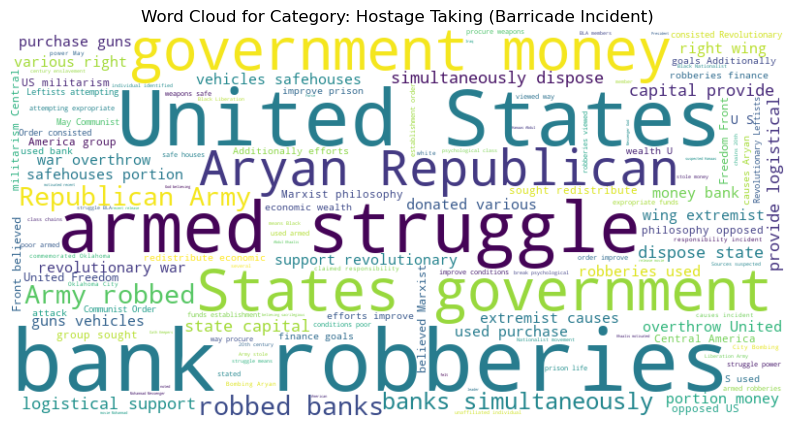

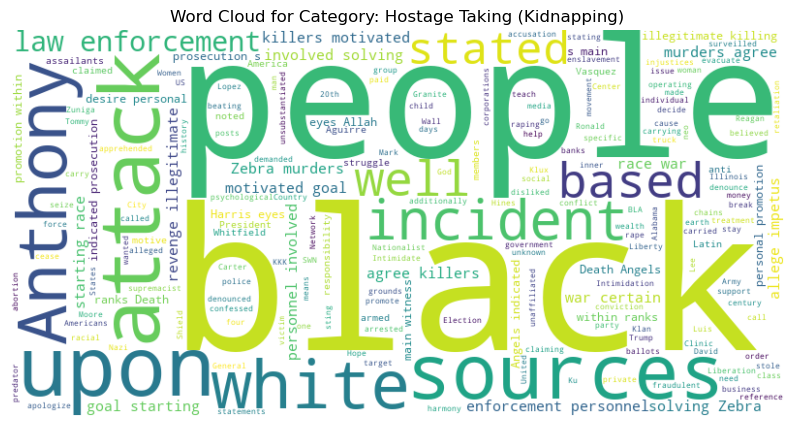

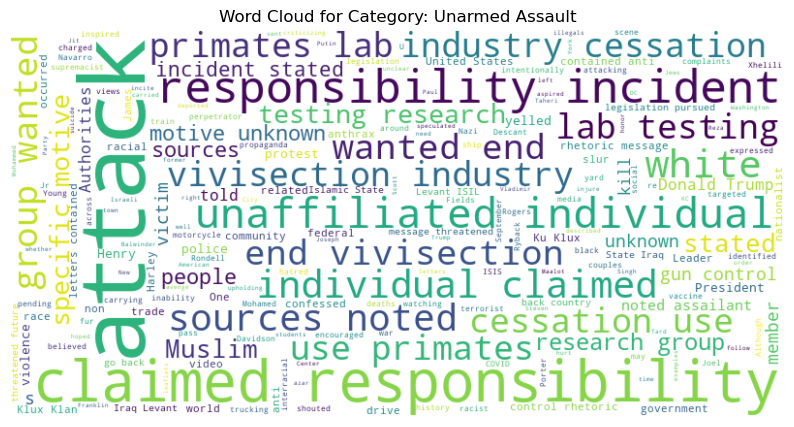

In [117]:
grouped_data = df.groupby('attacktype1_txt')['motive'].apply(lambda x: ' '.join(x))

def tokenize_without_stopwords(text):
    tokens = word_tokenize(text)
    return [word for word in tokens if word.lower() not in stop_words]
    
for category, text in grouped_data.items():
    # Tokenize text and remove stopwords
    tokens = tokenize_without_stopwords(text)
    
    # Create word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(tokens))
    
    # Display word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Category: {category}')
    plt.axis('off')
    plt.show()

In [154]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score


# One-hot encoding for categorical features
encoder = OneHotEncoder()
categorical_features = encoder.fit_transform(dfm[['targtype1_txt']])

def tokenize_without_stopwords(text):
    tokens = word_tokenize(text)
    return [word for word in tokens if word.lower() not in stop_words]

# Vectorize text feature
tfidf_vectorizer = TfidfVectorizer(tokenizer = tokenize_without_stopwords)
text_vectorized = tfidf_vectorizer.fit_transform(dfm['motive'])

# Combine features
combined_features = pd.concat([pd.DataFrame(categorical_features.toarray()), pd.DataFrame(text_vectorized.toarray(), columns=tfidf_vectorizer.get_feature_names_out())], axis=1)

combined_features.columns = combined_features.columns.astype(str)

C:\Users\casti\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [160]:
from sklearn.model_selection import GridSearchCV

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(combined_features, dfm['targtype1_txt'], test_size=0.2, random_state=42)

# Train a random forest classifier
rf = RandomForestClassifier()

# Grid Search CV
params = {'n_estimators': [10,100,500,1000], 'criterion':['gini','entropy'], 'max_depth':[3, 10, 100, None], 'random_state': [123]}
clf = GridSearchCV(estimator = rf, param_grid = params, cv = 5, verbose = 3)
clf.fit(X_train, y_train)

# Make predictions on the test set
#y_pred = cv.predict(X_test)



Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END criterion=gini, max_depth=3, n_estimators=10, random_state=123;, score=0.443 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, n_estimators=10, random_state=123;, score=0.454 total time=   0.0s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[CV 3/5] END criterion=gini, max_depth=3, n_estimators=10, random_state=123;, score=0.458 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, n_estimators=10, random_state=123;, score=0.542 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, n_estimators=10, random_state=123;, score=0.581 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, n_estimators=100, random_state=123;, score=0.579 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=3, n_estimators=100, random_state=123;, score=0.551 total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=3, n_estimators=100, random_state=123;, score=0.586 total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=3, n_estimators=100, random_state=123;, score=0.537 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=3, n_estimators=100, random_state=123;, score=0.559 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=3, n_estimators=500, random_state=123;, score=0.588 total time=   2.4s
[CV 2/5] END 

[CV 2/5] END criterion=gini, max_depth=None, n_estimators=1000, random_state=123;, score=0.965 total time=  38.3s
[CV 3/5] END criterion=gini, max_depth=None, n_estimators=1000, random_state=123;, score=0.965 total time=  39.2s
[CV 4/5] END criterion=gini, max_depth=None, n_estimators=1000, random_state=123;, score=0.978 total time=  39.7s
[CV 5/5] END criterion=gini, max_depth=None, n_estimators=1000, random_state=123;, score=0.987 total time=  44.5s
[CV 1/5] END criterion=entropy, max_depth=3, n_estimators=10, random_state=123;, score=0.487 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=3, n_estimators=10, random_state=123;, score=0.427 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=3, n_estimators=10, random_state=123;, score=0.489 total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=3, n_estimators=10, random_state=123;, score=0.586 total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=3, n_estimators=10, random_state=123;, score=0.454 tot

[CV 4/5] END criterion=entropy, max_depth=None, n_estimators=100, random_state=123;, score=0.960 total time=   3.6s
[CV 5/5] END criterion=entropy, max_depth=None, n_estimators=100, random_state=123;, score=0.956 total time=   3.6s
[CV 1/5] END criterion=entropy, max_depth=None, n_estimators=500, random_state=123;, score=0.956 total time=  18.6s
[CV 2/5] END criterion=entropy, max_depth=None, n_estimators=500, random_state=123;, score=0.938 total time=  19.6s
[CV 3/5] END criterion=entropy, max_depth=None, n_estimators=500, random_state=123;, score=0.947 total time=  17.3s
[CV 4/5] END criterion=entropy, max_depth=None, n_estimators=500, random_state=123;, score=0.947 total time=  19.3s
[CV 5/5] END criterion=entropy, max_depth=None, n_estimators=500, random_state=123;, score=0.965 total time=  19.6s
[CV 1/5] END criterion=entropy, max_depth=None, n_estimators=1000, random_state=123;, score=0.956 total time=  40.7s
[CV 2/5] END criterion=entropy, max_depth=None, n_estimators=1000, rand

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 10, 100, None],
                         'n_estimators': [10, 100, 500, 1000],
                         'random_state': [123]},
             verbose=3)

In [161]:
#best params appear to be: 

#gini, max_depth = 100, n_estimators = 100/500, random_state = 123

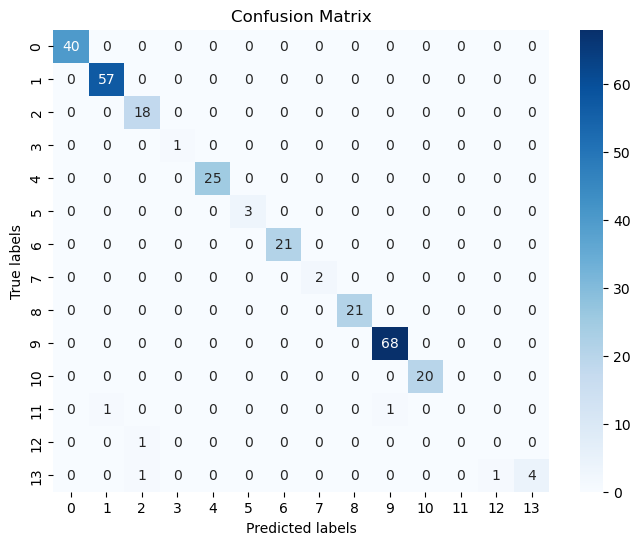

In [152]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix with label names
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()